In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence.if it is correctly identified.

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

There are 2123 rows and 11 columns present in the dataset.

In [4]:
df=pd.read_csv('Glass_identification.csv')                        #Loading the dataset in the dataframe
df 

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [59]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [60]:
df.tail()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [61]:
df.dtypes                                  ## Checking the type of data inorder to convert it into numerical data

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [62]:
df.columns     

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [63]:
df.isnull().sum()                            ##checking the if there is any null value in the dataset

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

<Axes: >

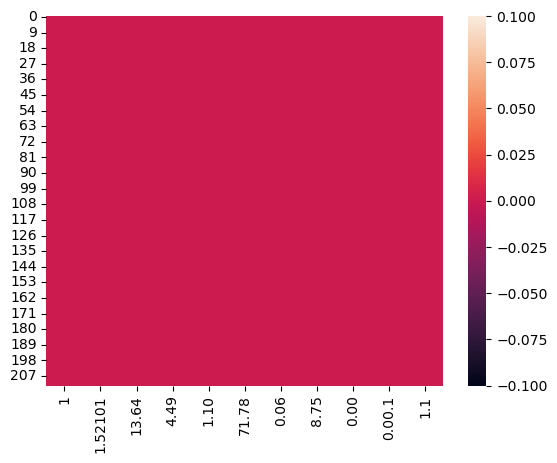

In [64]:
sns.heatmap(df.isnull())                ##visualizes the missing values using a heatmap.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


With the help of above function we can get the detailed information about the data like Range index,Colunm name, non-null count, data type and memory usage.

In [66]:
df.nunique().to_frame()

,0
1,213
1.52101,177
13.64,142
4.49,93
1.10,117
71.78,132
0.06,65
8.75,143
0.00,34
0.00.1,32


In [67]:
df.duplicated().sum() 

0

Renaming the coulums on the bases of above provided information in order to have better understanding of the data.

In [68]:
df.rename(columns={'1.52101': 'RI','13.64':'Na','4.49':'Mg','1.10':'Al','71.78':'Si','0.06':'K','8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'Type'}, inplace=True)

In [69]:
df

,1,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [70]:
df1=df.drop(['1'], axis=1)          #Droping the Id number

In [71]:
df1                           #New dataset after dropping the ID number

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [72]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


It statistics like count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each column in the dataset. After doing all the required changes in the dataset and as there no negative values present in the dataset it looks good to continue the data analysing. Following observations can be done on the bases of describe function. i Count of all the coulumns are equal. ii Right skewness of data is present because in few columns because mean is more than median.iii Left skewness is also present as in few columns median is more than mean.iv There are also chances of outlier in some columns  like K,Ca,Ba becasuse there is major difference in the values of 75% and max in some columns.

DATA VISUALIZATION Various graphs are used to inorder to understand how the data is distributed,it's skweness, scattered.

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


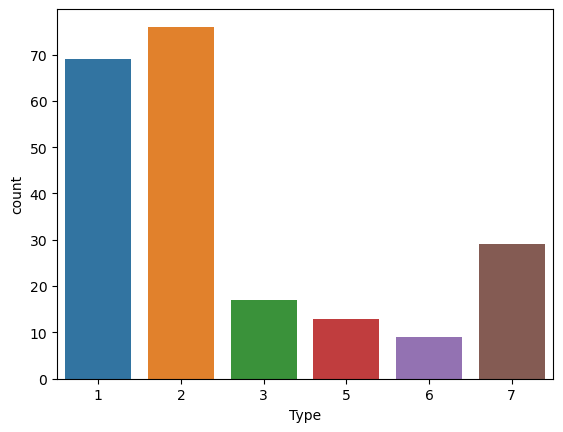

In [171]:
print(df1['Type'].value_counts())
ax=sns.countplot(x='Type',data=df1)

<Axes: xlabel='Na', ylabel='Count'>

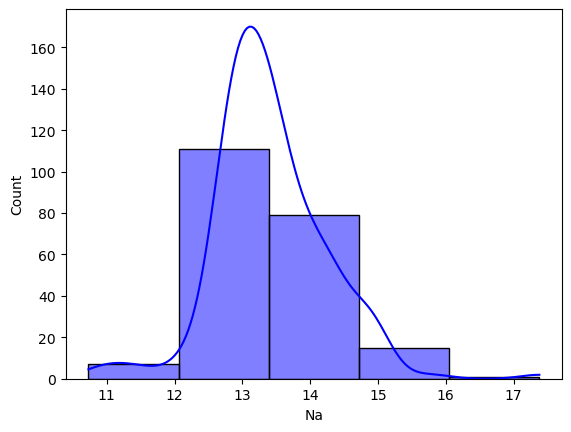

In [170]:
sns.histplot(data=df1,x='Na',bins=5,kde=True,color='b')

<Axes: xlabel='RI', ylabel='Count'>

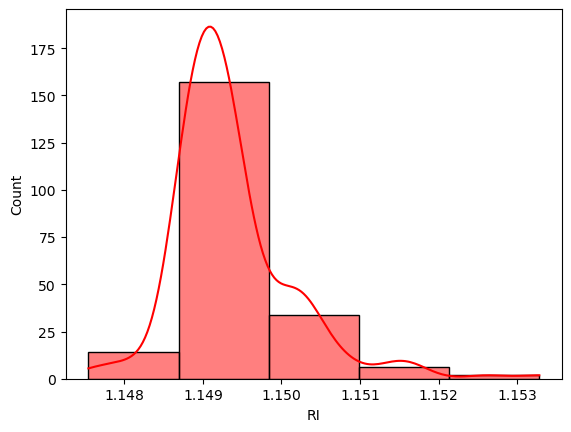

In [141]:
sns.histplot(data=df1,x='RI',bins=5,kde=True,color='r')

<Axes: xlabel='Mg', ylabel='Count'>

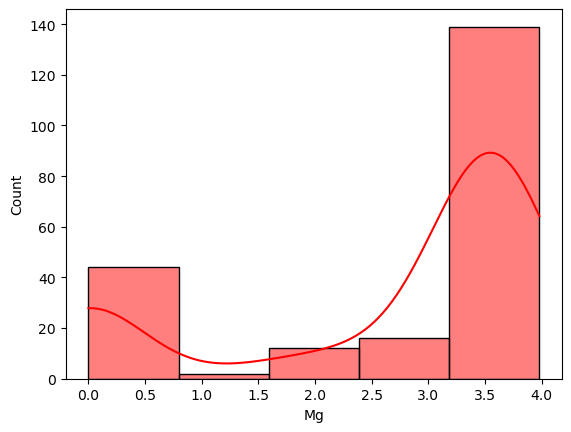

In [142]:
sns.histplot(data=df1,x='Mg',bins=5,kde=True,color='r')

<Axes: xlabel='Al', ylabel='Count'>

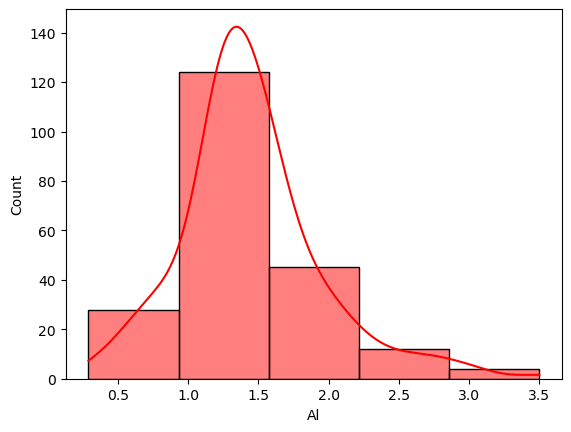

In [143]:
sns.histplot(data=df1,x='Al',bins=5,kde=True,color='r')

<Axes: xlabel='Si', ylabel='Count'>

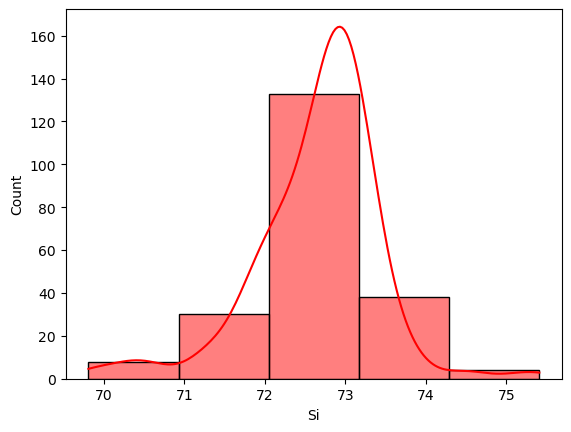

In [144]:
sns.histplot(data=df1,x='Si',bins=5,kde=True,color='r')

<Axes: xlabel='K', ylabel='Count'>

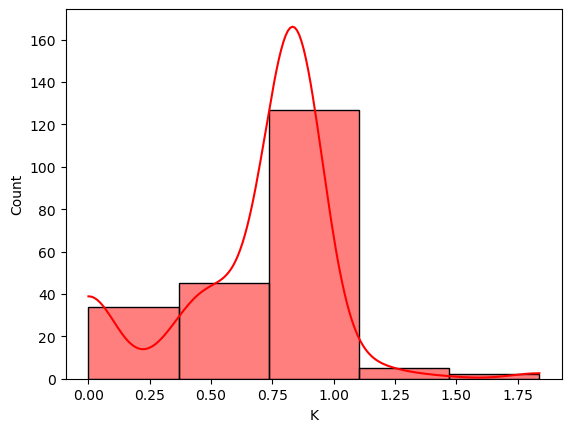

In [145]:
sns.histplot(data=df1,x='K',bins=5,kde=True,color='r')

<Axes: xlabel='Ca', ylabel='Count'>

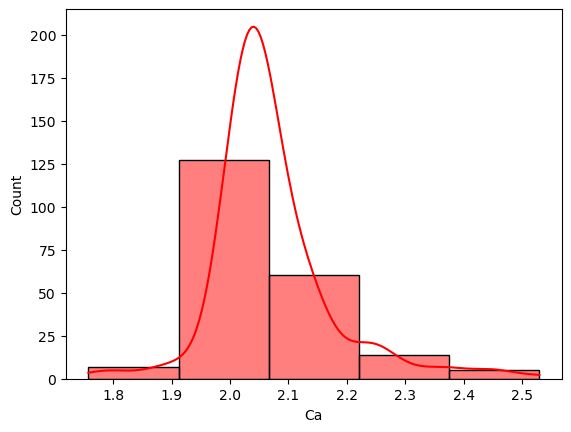

In [146]:
sns.histplot(data=df1,x='Ca',bins=5,kde=True,color='r')

<Axes: xlabel='Ba', ylabel='Count'>

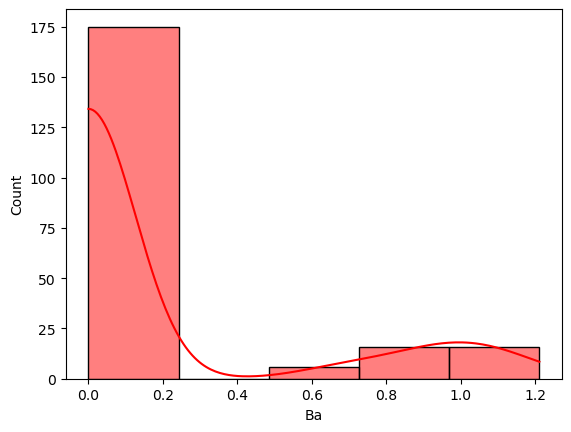

In [147]:
sns.histplot(data=df1,x='Ba',bins=5,kde=True,color='r')

<Axes: xlabel='Fe', ylabel='Count'>

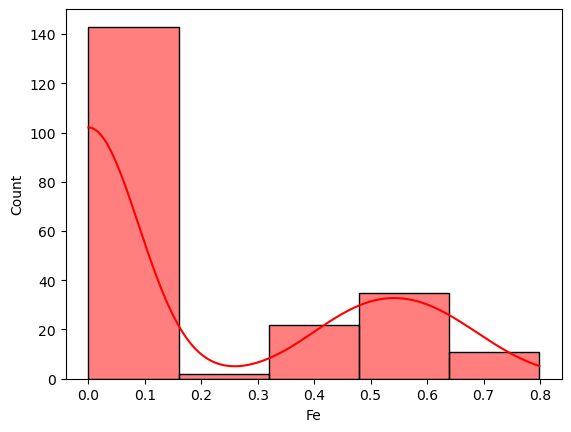

In [148]:
sns.histplot(data=df1,x='Fe',bins=5,kde=True,color='r')

Text(0.5, 1.0, 'Na VS Type')

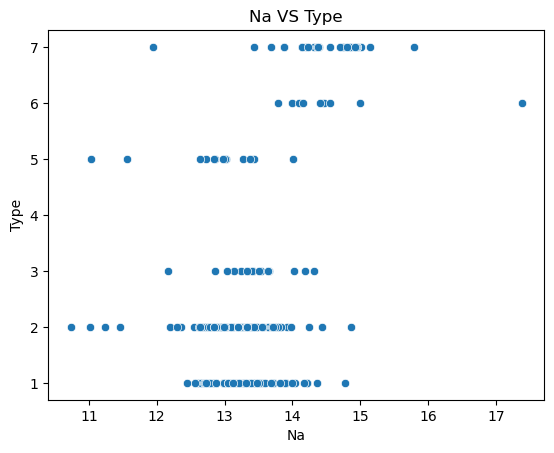

In [149]:
sns.scatterplot(x='Na',y='Type',data=df1,palette='bright')
plt.title('Na VS Type')

Text(0.5, 1.0, 'Ri VS Type')

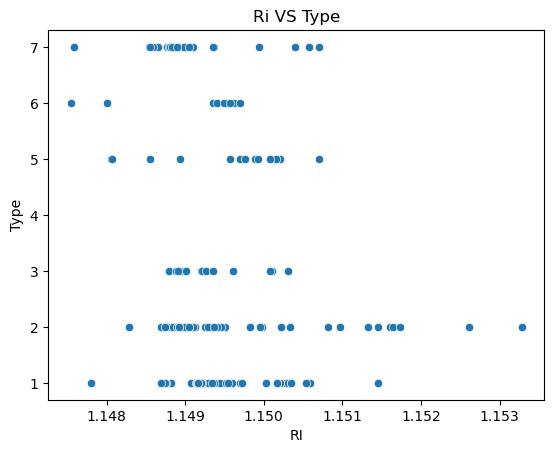

In [150]:
sns.scatterplot(x='RI',y='Type',data=df1,palette='bright')
plt.title('Ri VS Type')

Text(0.5, 1.0, 'Mg VS Type')

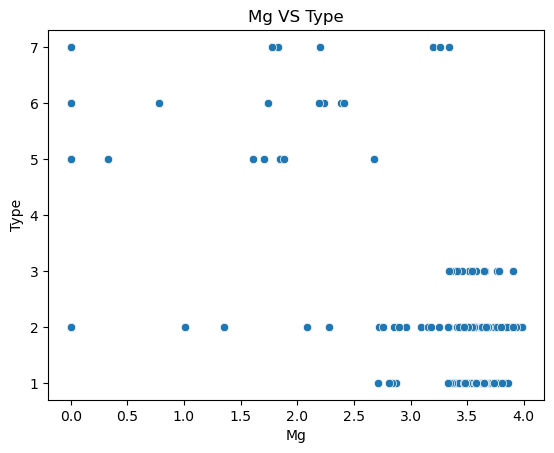

In [151]:
sns.scatterplot(x='Mg',y='Type',data=df1,palette='bright')
plt.title('Mg VS Type')

Text(0.5, 1.0, 'Al VS Type')

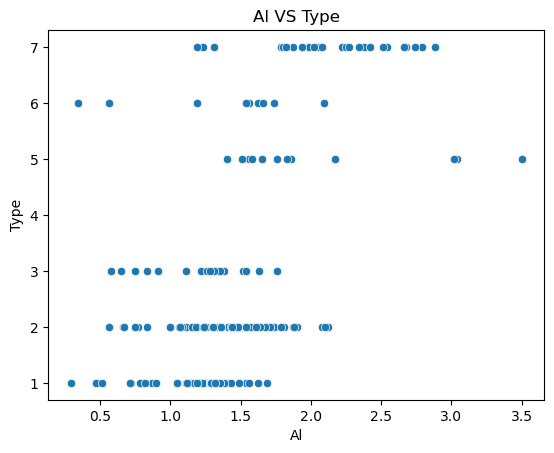

In [152]:
sns.scatterplot(x='Al',y='Type',data=df1,palette='bright')
plt.title('Al VS Type')

Text(0.5, 1.0, 'Si VS Type')

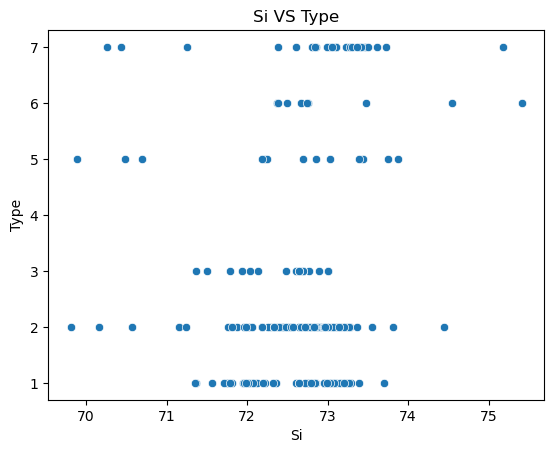

In [153]:
sns.scatterplot(x='Si',y='Type',data=df1,palette='bright')
plt.title('Si VS Type')

Text(0.5, 1.0, 'K VS Type')

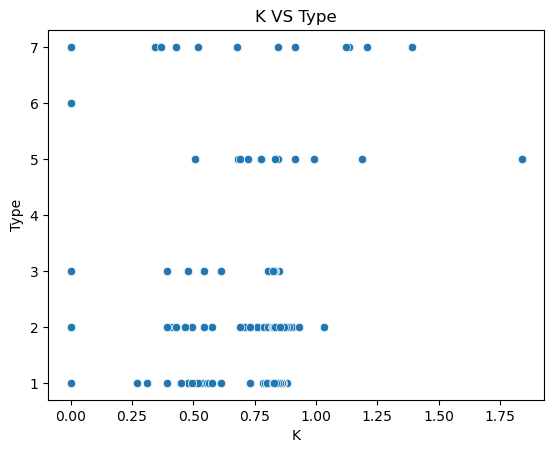

In [154]:
sns.scatterplot(x='K',y='Type',data=df1,palette='bright')
plt.title('K VS Type')

Text(0.5, 1.0, 'Ca VS Type')

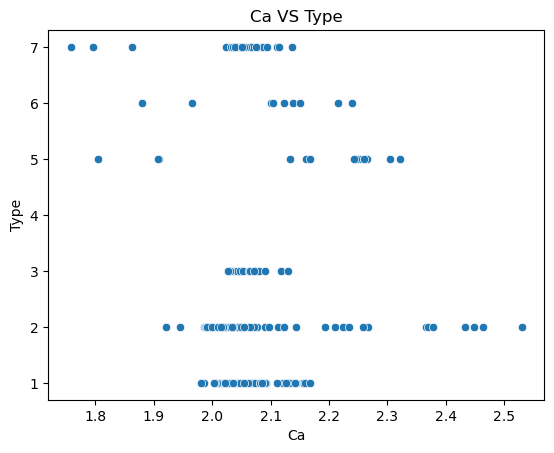

In [155]:
sns.scatterplot(x='Ca',y='Type',data=df1,palette='bright')
plt.title('Ca VS Type')

Text(0.5, 1.0, 'Ba VS Type')

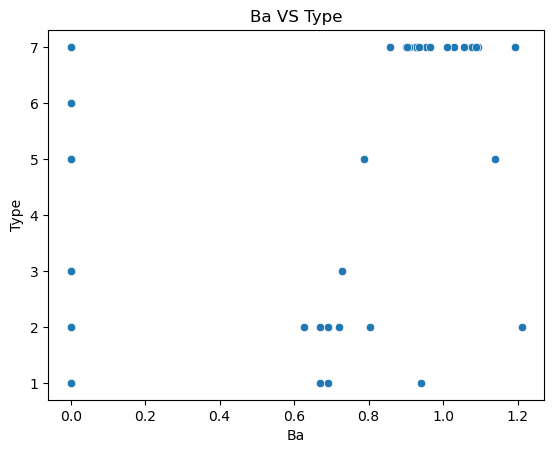

In [156]:
sns.scatterplot(x='Ba',y='Type',data=df1,palette='bright')
plt.title('Ba VS Type')

Text(0.5, 1.0, 'Fe VS Type')

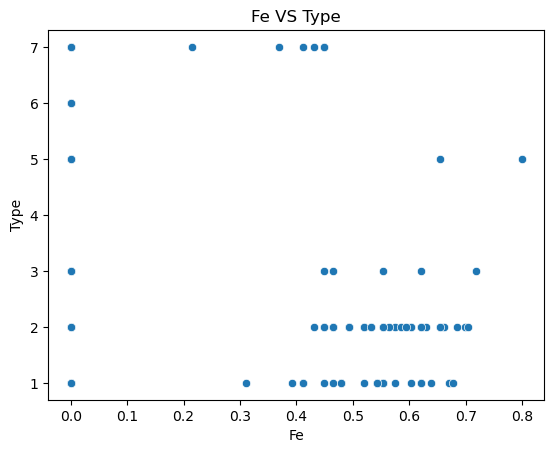

In [157]:
sns.scatterplot(x='Fe',y='Type',data=df1,palette='bright')
plt.title('Fe VS Type')

Using regression plots to creates the relationship between two numerical variables using scatter points and a fitted regression line.If the points are widely scattered, it suggests a weaker relationship between the variables.

<Axes: xlabel='RI', ylabel='Type'>

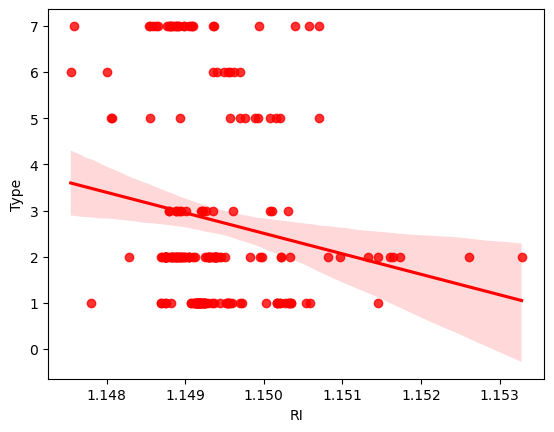

In [158]:
sns.regplot(data=df1, x="RI", y="Type", color='r')

<Axes: xlabel='Na', ylabel='Type'>

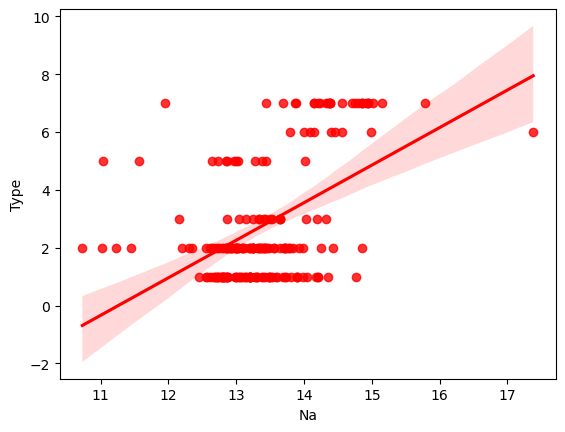

In [159]:
sns.regplot(data=df1, x="Na", y="Type", color='r')

<Axes: xlabel='Mg', ylabel='Type'>

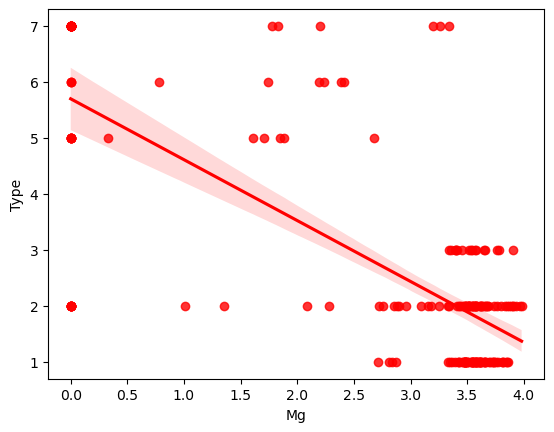

In [160]:
sns.regplot(data=df1, x="Mg", y="Type", color='r')

<Axes: xlabel='Al', ylabel='Type'>

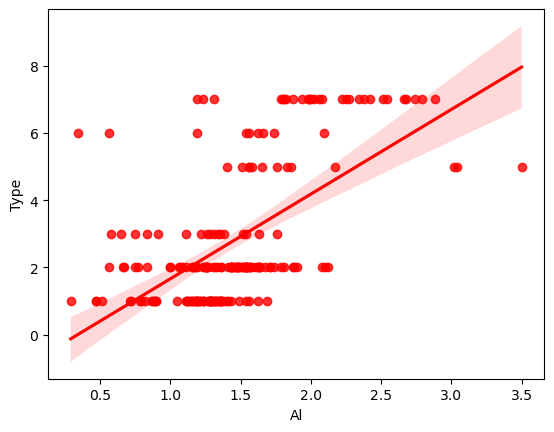

In [161]:
sns.regplot(data=df1, x="Al", y="Type", color='r')

<Axes: xlabel='Si', ylabel='Type'>

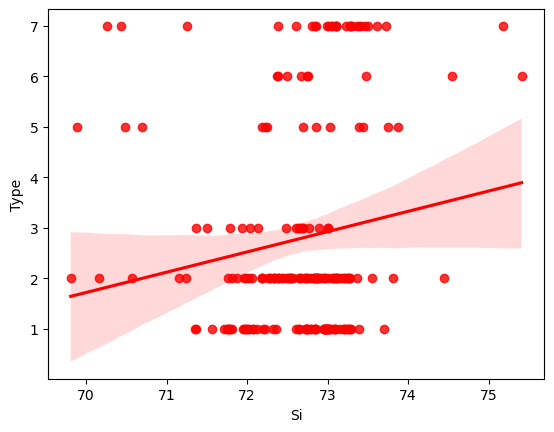

In [162]:
sns.regplot(data=df1, x="Si", y="Type", color='r')

<Axes: xlabel='K', ylabel='Type'>

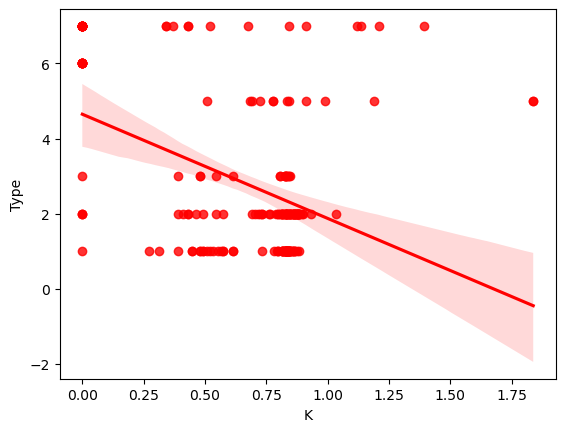

In [163]:
sns.regplot(data=df1, x="K", y="Type", color='r')

<Axes: xlabel='Ca', ylabel='Type'>

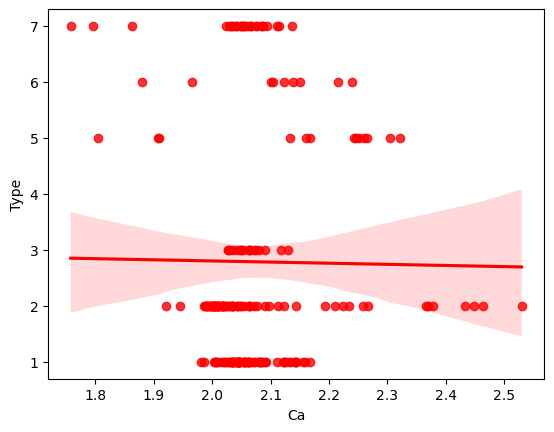

In [164]:
sns.regplot(data=df1, x="Ca", y="Type", color='r')

<Axes: xlabel='Ba', ylabel='Type'>

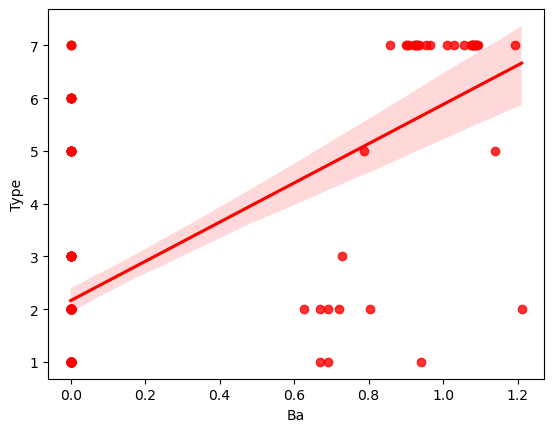

In [165]:
sns.regplot(data=df1, x="Ba", y="Type", color='r')

<Axes: xlabel='Fe', ylabel='Type'>

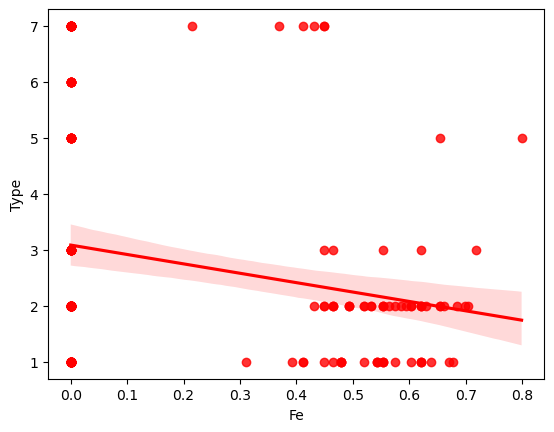

In [166]:
sns.regplot(data=df1, x="Fe", y="Type", color='r')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


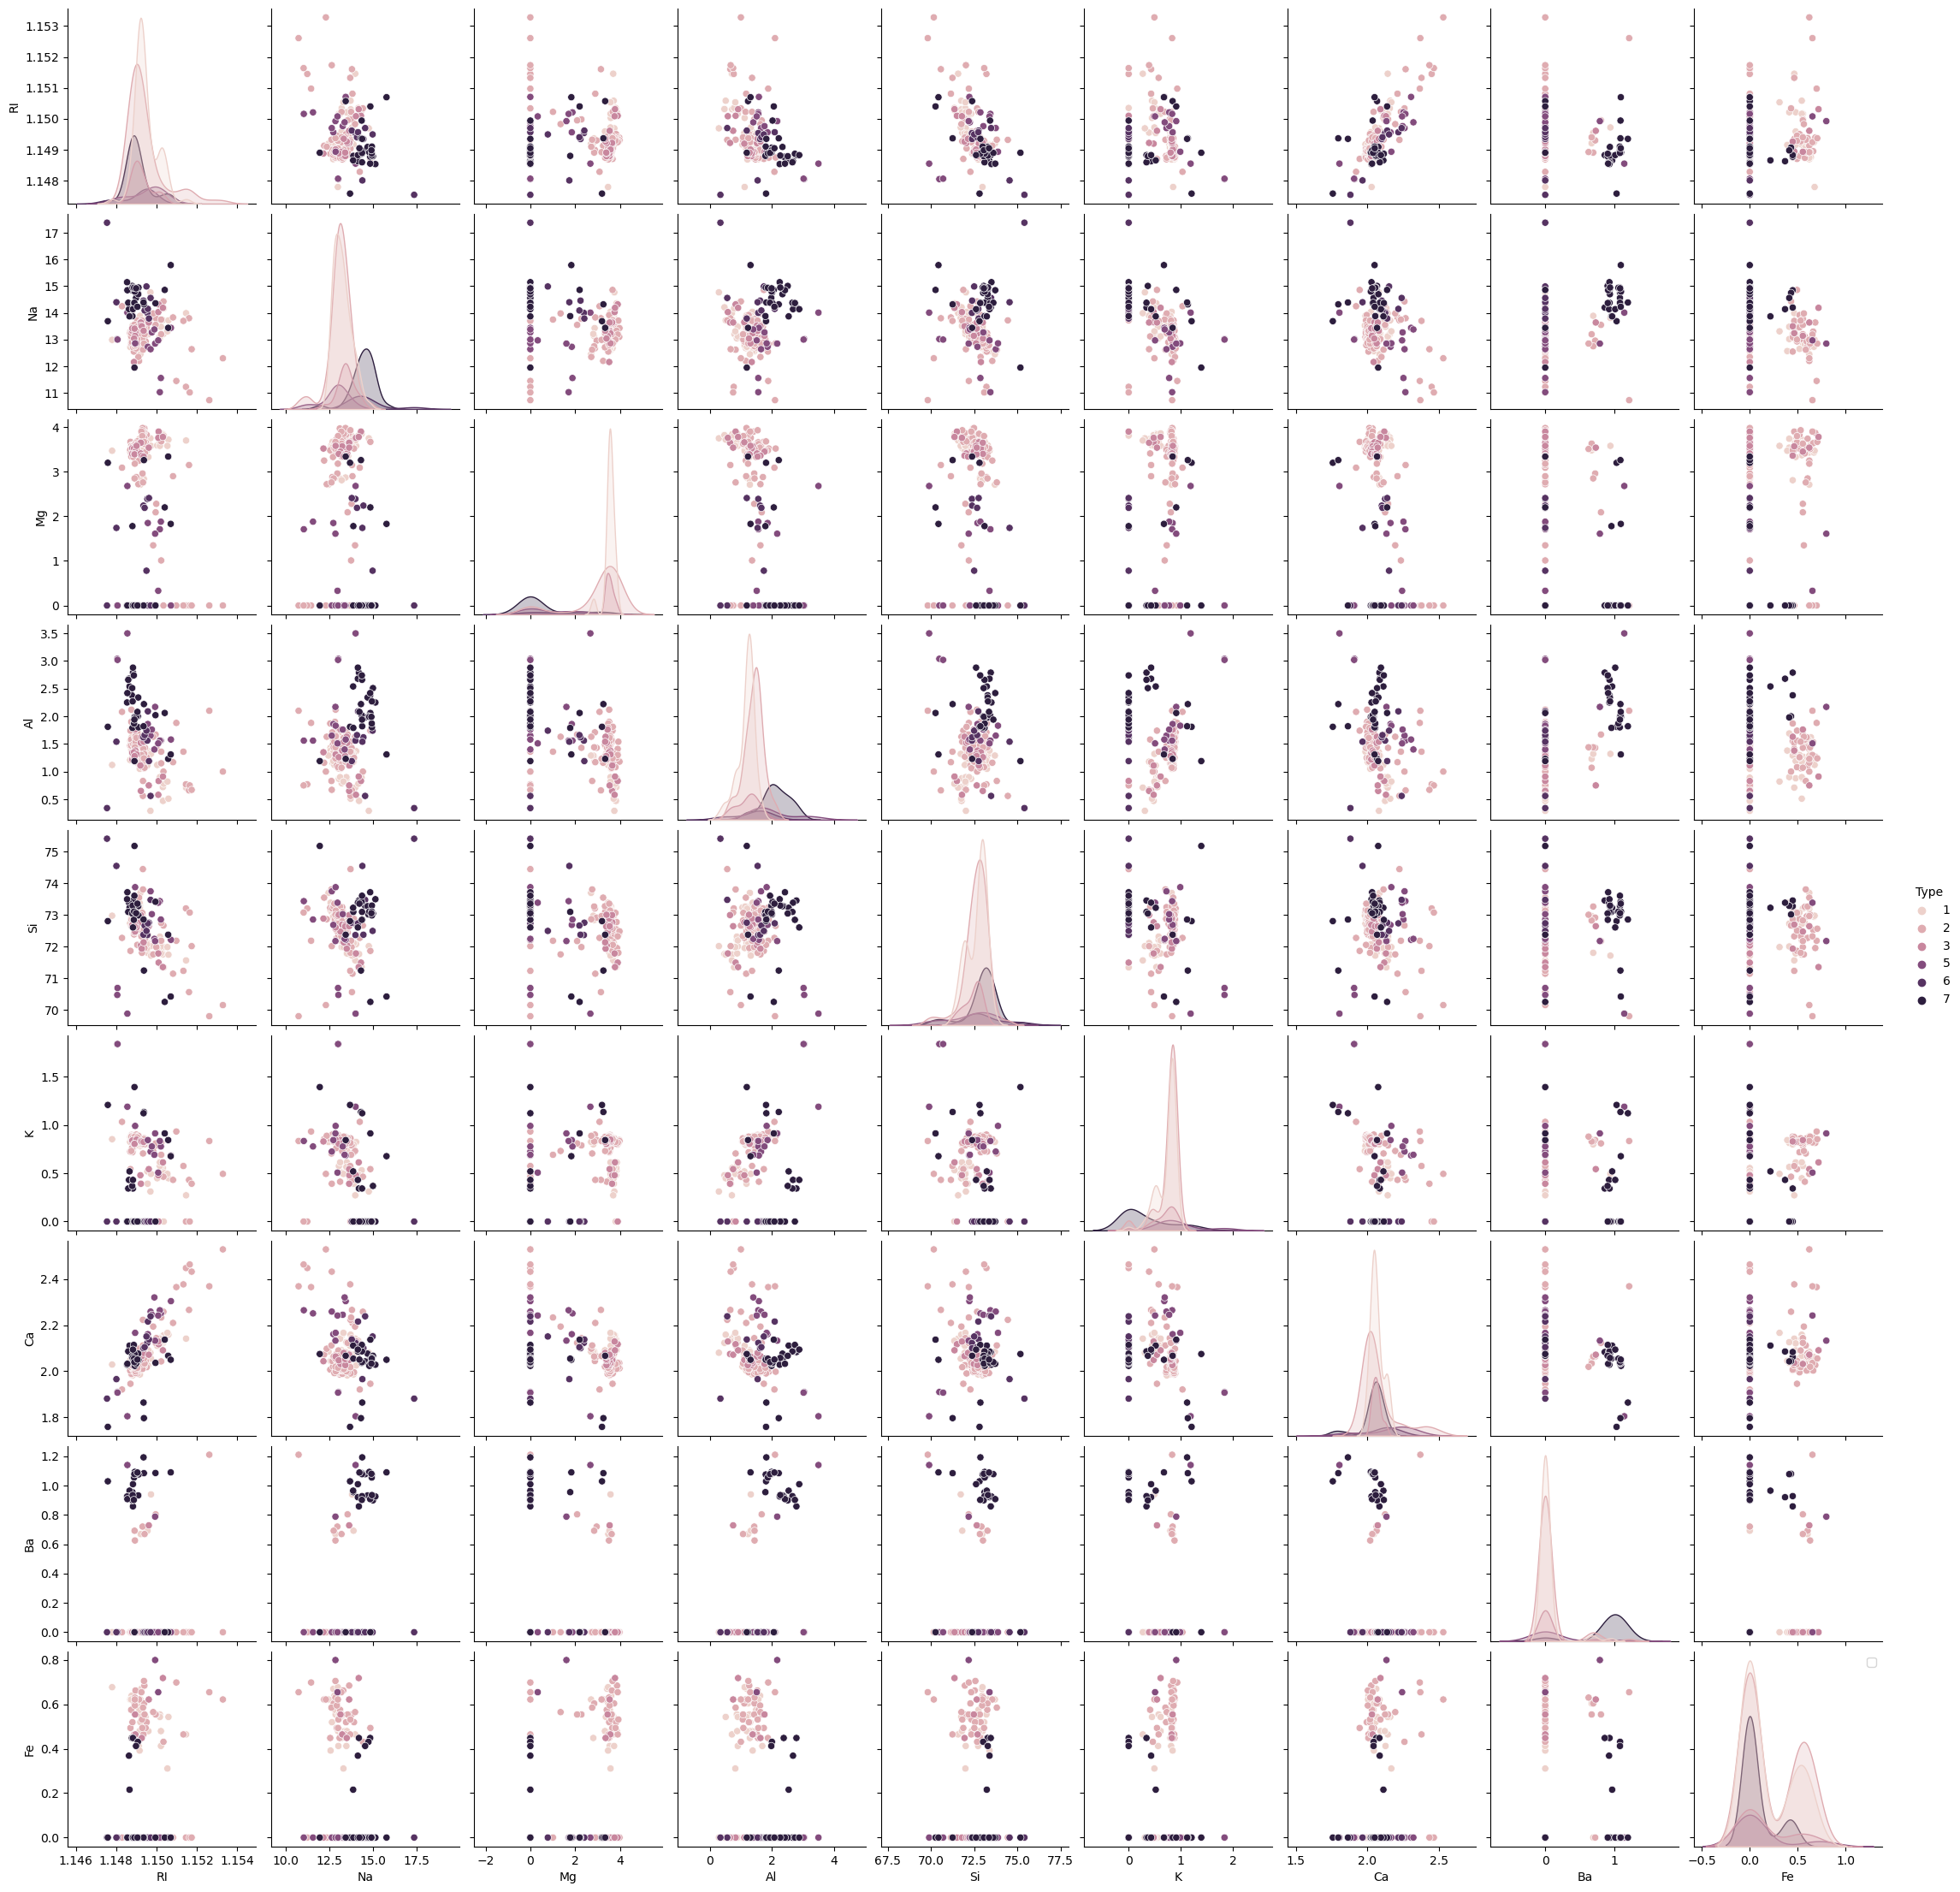

In [168]:
sns.pairplot(data=df1, hue='Type')
plt.legend()
plt.show()

RI         Axes(0.125,0.53;0.133621x0.35)
Na      Axes(0.285345,0.53;0.133621x0.35)
Mg       Axes(0.44569,0.53;0.133621x0.35)
Al      Axes(0.606034,0.53;0.133621x0.35)
Si      Axes(0.766379,0.53;0.133621x0.35)
K          Axes(0.125,0.11;0.133621x0.35)
Ca      Axes(0.285345,0.11;0.133621x0.35)
Ba       Axes(0.44569,0.11;0.133621x0.35)
Fe      Axes(0.606034,0.11;0.133621x0.35)
Type    Axes(0.766379,0.11;0.133621x0.35)
dtype: object

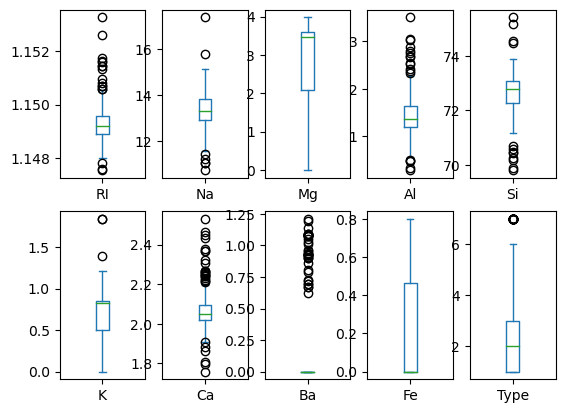

In [138]:
df1.plot(kind='box',subplots=True,layout=(2,5))     #checking the outliers in the dataset

From the above plots it is observeed that outliers are present in few columns of the dataset.Inorder to remove thoes outliers zscore is imported and as the threshold value for zscore is between -3 to +3 keeping that in mind removing the outliers.

In [76]:
from scipy.stats import zscore
out_liers=df1[['RI','Na','Al','Si','K','Ca','Ba','Fe']]
z=np.abs(zscore(out_liers))
z

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,0.245101,0.591880,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301
1,0.716826,0.150946,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301
2,0.228607,0.240996,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301
3,0.307777,0.167507,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301
4,0.789399,0.755419,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200
...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301
209,0.495808,1.853443,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301
210,0.757727,1.167545,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301
211,0.607966,1.192041,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301


In [77]:
np.where(z>3)

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
        130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
        187, 188, 200, 200, 202, 206, 212]),
 array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
        4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6]))

In [78]:
data=df1[(z<3).all(axis=1)]
data.shape

(193, 10)

In [79]:
print("dataloss",((df1.shape[0]-data.shape[0])/df1.shape[0])*100)

dataloss 9.389671361502346


In [80]:
df1.skew()                 # #checking the skewness of data

RI      1.639658
Na      0.457318
Mg     -1.154323
Al      0.900017
Si     -0.744546
K       6.549276
Ca      2.040591
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

In [81]:
df1[['K','RI','Ca','Ba','Fe']]=np.cbrt(df1[['K','RI','Ca','Ba','Fe']])      #Removing the skewness using cuberoot method

In [82]:
df1.skew()  

RI      1.631276
Na      0.457318
Mg     -1.154323
Al      0.900017
Si     -0.744546
K      -0.602542
Ca      1.402709
Ba      2.065220
Fe      0.887382
Type    1.108861
dtype: float64

In [83]:
df1['Ba']=np.sqrt(df1['Ba'])

In [84]:
df1.skew()

RI      1.631276
Na      0.457318
Mg     -1.154323
Al      0.900017
Si     -0.744546
K      -0.602542
Ca      1.402709
Ba      1.810219
Fe      0.887382
Type    1.108861
dtype: float64

In [85]:
df1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.193363,-0.127735,-0.405931,-0.539907,-0.209223,0.804777,-0.109141,0.135799,-0.161504
Na,-0.193363,1.000000,-0.276486,0.157928,-0.068519,-0.539691,-0.264899,0.417390,-0.196262,0.504983
Mg,-0.127735,-0.276486,1.000000,-0.480035,-0.160359,0.450819,-0.425287,-0.533633,0.094320,-0.744004
Al,-0.405931,0.157928,-0.480035,1.000000,-0.009226,0.063710,-0.277267,0.557610,-0.077610,0.597754
Si,-0.539907,-0.068519,-0.160359,-0.009226,1.000000,-0.177299,-0.191783,0.017280,-0.082123,0.147767
K,-0.209223,-0.539691,0.450819,0.063710,-0.177299,1.000000,-0.353358,-0.354419,0.116944,-0.438043
Ca,0.804777,-0.264899,-0.425287,-0.277267,-0.191783,-0.353358,1.000000,-0.142152,0.116666,-0.009840
Ba,-0.109141,0.417390,-0.533633,0.557610,0.017280,-0.354419,-0.142152,1.000000,-0.009934,0.650266
Fe,0.135799,-0.196262,0.094320,-0.077610,-0.082123,0.116944,0.116666,-0.009934,1.000000,-0.208050
Type,-0.161504,0.504983,-0.744004,0.597754,0.147767,-0.438043,-0.009840,0.650266,-0.208050,1.000000


Above correlation is checked between the different variable and its values range from -1 to 1, where:
1 indicates a perfect positive correlation (as one variable increases, the other increases).
-1 indicates a perfect negative correlation (as one variable increases, the other decreases).
0 indicates no linear correlation between the variables.
It can be observed that Al and Type are positively corelated where as Mg and Type are negatively correlated. Similar observations can be made about the other variable

<Axes: >

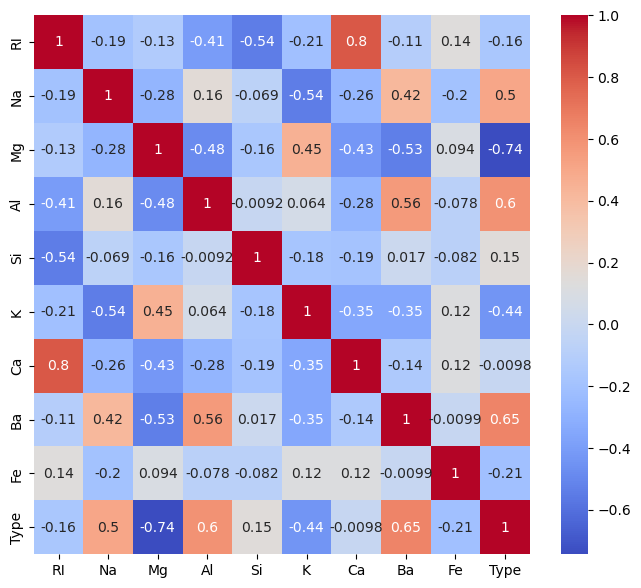

In [86]:
plt.figure(figsize=(8,7))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

Making the data ready for applying various models but diving it into dependent and independent variable. Spliting it in Test and Train.

In [87]:
X=df1.drop(columns =['Type'])
Y=df1['Type']

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
st=StandardScaler()
X=st.fit_transform(X)
X

array([[-0.24473982,  0.59188032,  0.64293659, ..., -0.84013142,
        -0.45843028, -0.68171268],
       [-0.71727587,  0.15094587,  0.60814353, ..., -0.88153431,
        -0.45843028, -0.68171268],
       [-0.22822295, -0.24099586,  0.7055641 , ..., -0.52308429,
        -0.45843028, -0.68171268],
       ...,
       [ 0.75882695,  1.16754474, -1.8621639 , ..., -0.34864333,
         2.49801986, -0.68171268],
       [-0.60820273,  1.19204109, -1.8621639 , ..., -0.31725353,
         2.47660411, -0.68171268],
       [-0.40992845,  1.00831841, -1.8621639 , ..., -0.20816031,
         2.50696549, -0.68171268]])

In [90]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=.30,random_state=65)
print('Training size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training size: (149, 9)
Training target size: (149,)
Test size: (64, 9)
Test target size: (64,)


In [92]:
X

array([[-0.24473982,  0.59188032,  0.64293659, ..., -0.84013142,
        -0.45843028, -0.68171268],
       [-0.71727587,  0.15094587,  0.60814353, ..., -0.88153431,
        -0.45843028, -0.68171268],
       [-0.22822295, -0.24099586,  0.7055641 , ..., -0.52308429,
        -0.45843028, -0.68171268],
       ...,
       [ 0.75882695,  1.16754474, -1.8621639 , ..., -0.34864333,
         2.49801986, -0.68171268],
       [-0.60820273,  1.19204109, -1.8621639 , ..., -0.31725353,
         2.47660411, -0.68171268],
       [-0.40992845,  1.00831841, -1.8621639 , ..., -0.20816031,
         2.50696549, -0.68171268]])

In [93]:
lm=LogisticRegression()
lm.fit(X_train,Y_train)
lm.score(X_train,Y_train)
lm.score(X_test,Y_test)
pred1=lm.predict(X_train)
pred=lm.predict(X_test)
print("accuracy score",accuracy_score(Y_test,pred))
print("confusion matrix \n",confusion_matrix(Y_test,pred))
print("classification report \n",classification_report(Y_test,pred))   


accuracy score 0.703125
confusion matrix 
 [[18  5  0  0  0  0]
 [ 4 19  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 0  3  0  1  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
classification report 
               precision    recall  f1-score   support

           1       0.75      0.78      0.77        23
           2       0.63      0.79      0.70        24
           3       0.00      0.00      0.00         4
           5       1.00      0.20      0.33         5
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.70        64
   macro avg       0.65      0.60      0.57        64
weighted avg       0.68      0.70      0.67        64



In [94]:
rf=RandomForestClassifier ()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
rf.score(X_test,Y_test)
pred1=rf.predict(X_train)
pred=rf.predict(X_test)
print("accuracy score",accuracy_score(Y_test,pred))
print("confusion matrix \n",confusion_matrix(Y_test,pred))
print("classification report \n",classification_report(Y_test,pred))   


accuracy score 0.75
confusion matrix 
 [[18  4  1  0  0  0]
 [ 1 21  1  0  1  0]
 [ 3  1  0  0  0  0]
 [ 0  2  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
classification report 
               precision    recall  f1-score   support

           1       0.82      0.78      0.80        23
           2       0.72      0.88      0.79        24
           3       0.00      0.00      0.00         4
           5       1.00      0.40      0.57         5
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.75        64
   macro avg       0.67      0.65      0.63        64
weighted avg       0.74      0.75      0.73        64



In [95]:
et=ExtraTreesClassifier()
et.fit(X_train,Y_train)
et.score(X_train,Y_train)
et.score(X_test,Y_test)
pred1=et.predict(X_train)
pred=et.predict(X_test)
print("accuracy score",accuracy_score(Y_test,pred))
print("confusion matrix \n",confusion_matrix(Y_test,pred))
print("classification report \n",classification_report(Y_test,pred))   


accuracy score 0.796875
confusion matrix 
 [[19  3  1  0  0  0]
 [ 1 21  1  0  1  0]
 [ 2  1  1  0  0  0]
 [ 0  1  0  3  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
classification report 
               precision    recall  f1-score   support

           1       0.86      0.83      0.84        23
           2       0.78      0.88      0.82        24
           3       0.33      0.25      0.29         4
           5       1.00      0.60      0.75         5
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.80        64
   macro avg       0.75      0.73      0.72        64
weighted avg       0.80      0.80      0.79        64



In [96]:
sv=SVC()
sv.fit(X_train,Y_train)
sv.score(X_train,Y_train)
sv.score(X_test,Y_test)
pred1=sv.predict(X_train)
pred=sv.predict(X_test)
print("accuracy score",accuracy_score(Y_test,pred))
print("confusion matrix \n",confusion_matrix(Y_test,pred))
print("classification report \n",classification_report(Y_test,pred))   


accuracy score 0.71875
confusion matrix 
 [[17  6  0  0  0  0]
 [ 4 19  0  0  1  0]
 [ 1  3  0  0  0  0]
 [ 0  1  0  3  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
classification report 
               precision    recall  f1-score   support

           1       0.77      0.74      0.76        23
           2       0.63      0.79      0.70        24
           3       0.00      0.00      0.00         4
           5       1.00      0.60      0.75         5
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.72        64
   macro avg       0.65      0.66      0.64        64
weighted avg       0.69      0.72      0.70        64



In [97]:
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
gb.score(X_train,Y_train)
gb.score(X_test,Y_test)
pred1=gb.predict(X_train)
pred=gb.predict(X_test)
print("accuracy score",accuracy_score(Y_test,pred))
print("confusion matrix \n",confusion_matrix(Y_test,pred))
print("classification report \n",classification_report(Y_test,pred))   

accuracy score 0.734375
confusion matrix 
 [[20  2  1  0  0  0]
 [ 1 20  2  0  1  0]
 [ 4  0  0  0  0  0]
 [ 0  3  0  1  0  1]
 [ 0  0  0  1  1  0]
 [ 0  1  0  0  0  5]]
classification report 
               precision    recall  f1-score   support

           1       0.80      0.87      0.83        23
           2       0.77      0.83      0.80        24
           3       0.00      0.00      0.00         4
           5       0.50      0.20      0.29         5
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.73        64
   macro avg       0.57      0.54      0.54        64
weighted avg       0.71      0.73      0.72        64



In [98]:
ab=AdaBoostClassifier()
ab.fit(X_train,Y_train)
ab.score(X_train,Y_train)
ab.score(X_test,Y_test)
pred1=ab.predict(X_train)
pred=ab.predict(X_test)
print("accuracy score",accuracy_score(Y_test,pred))
print("confusion matrix \n",confusion_matrix(Y_test,pred))
print("classification report \n",classification_report(Y_test,pred))   


accuracy score 0.4375
confusion matrix 
 [[21  2  0  0  0  0]
 [17  3  0  2  2  0]
 [ 4  0  0  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  5  0  1  0  0]]
classification report 
               precision    recall  f1-score   support

           1       0.50      0.91      0.65        23
           2       0.23      0.12      0.16        24
           3       0.00      0.00      0.00         4
           5       0.40      0.40      0.40         5
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         6

    accuracy                           0.44        64
   macro avg       0.27      0.41      0.31        64
weighted avg       0.31      0.44      0.35        64



In [99]:
bb=BaggingClassifier()
bb.fit(X_train,Y_train)
bb.score(X_train,Y_train)
bb.score(X_test,Y_test)
pred1=bb.predict(X_train)
pred=bb.predict(X_test)
print("accuracy score",accuracy_score(Y_test,pred))
print("confusion matrix \n",confusion_matrix(Y_test,pred))
print("classification report \n",classification_report(Y_test,pred))   


accuracy score 0.75
confusion matrix 
 [[20  2  1  0  0  0]
 [ 3 19  1  0  1  0]
 [ 1  3  0  0  0  0]
 [ 0  2  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  1  0  0  5]]
classification report 
               precision    recall  f1-score   support

           1       0.83      0.87      0.85        23
           2       0.73      0.79      0.76        24
           3       0.00      0.00      0.00         4
           5       1.00      0.40      0.57         5
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.75        64
   macro avg       0.68      0.65      0.64        64
weighted avg       0.75      0.75      0.74        64



All the models above shows Accuracy Score on test and train data also confusion matrix, classification report and accuracy macro avg weighted veg. From the above models the best suited for the dataset is ExtraTreesClassifier with 79% accuracy but still will be further to do cross validation on all the models to select the best suited model the given dataset.

In [100]:
cv=cross_val_score(gb,X,Y)
print(cv)
print(cv.mean()*100)
print((cv.std())*100)

[0.65116279 0.81395349 0.74418605 0.5952381  0.76190476]
71.32890365448506
7.9053325047478475


In [101]:
cv1=cross_val_score(ab,X,Y)
print(cv1)
print(cv1.mean()*100)
print((cv1.std())*100)

[0.41860465 0.27906977 0.41860465 0.19047619 0.38095238]
33.754152823920265
8.95255520079326


In [102]:
cv2=cross_val_score(bb,X,Y)
print(cv2)
print(cv2.mean()*100)
print((cv2.std())*100)

[0.60465116 0.62790698 0.62790698 0.54761905 0.73809524]
62.923588039867106
6.183786455044474


In [103]:
cv3=cross_val_score(sv,X,Y)
print(cv3)
print(cv3.mean()*100)
print((cv3.std())*100)

[0.58139535 0.72093023 0.58139535 0.69047619 0.69047619]
65.29346622369879
5.946070465743209


In [104]:
cv4=cross_val_score(et,X,Y)
print(cv4)
print(cv4.mean()*100)
print((cv4.std())*100)

[0.62790698 0.74418605 0.65116279 0.64285714 0.71428571]
67.60797342192691
4.504081682413905


In [105]:
cv5=cross_val_score(rf,X,Y)
print(cv5)
print(cv5.mean()*100)
print((cv5.std())*100)

[0.6744186  0.79069767 0.69767442 0.52380952 0.83333333]
70.39867109634551
10.735667340062003


In [106]:
cv6=cross_val_score(lm,X,Y)
print(cv6)
print(cv6.mean()*100)
print((cv6.std())*100)

[0.53488372 0.69767442 0.58139535 0.5952381  0.5952381 ]
60.08859357696568
5.323153568613386


After Cross Valadition Score it is observed that the best suited model is Gradient Boosting Classifier.Also doing Hyperparameter Tuning with Grid Search

In [108]:
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

In [109]:
grid_GBC = GridSearchCV(gb, parameters,cv=2,n_jobs=-1)
grid_GBC.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [111]:
import joblib
joblib.dump(gb,'Glass_identification.obj')                     ##loading the model
gb_from_joblib=joblib.load('Glass_identification.obj')
gb_from_joblib.predict(X_test)

array([2, 1, 3, 2, 1, 2, 6, 1, 1, 2, 1, 2, 1, 2, 1, 7, 3, 2, 1, 2, 2, 2,
       1, 1, 2, 5, 7, 7, 1, 2, 2, 6, 2, 2, 7, 2, 2, 3, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 7, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 7, 2, 2, 1, 5])

In [112]:
import pickle
filename="Glass_identification.pkl1"                                  ##Saving the model
pickle.dump(gb,open(filename,'wb'))
Final_Model=pickle.load(open(filename,'rb'))
result=Final_Model.predict(X_test)
print(result)

[2 1 3 2 1 2 6 1 1 2 1 2 1 2 1 7 3 2 1 2 2 2 1 1 2 5 7 7 1 2 2 6 2 2 7 2 2
 3 1 1 1 1 2 1 1 2 1 7 2 2 2 1 1 2 1 1 1 1 2 7 2 2 1 5]
